In [1]:
import numpy as np
import matplotlib.pyplot as plt

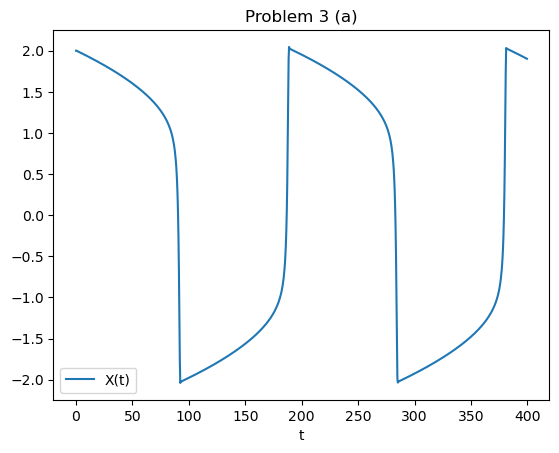

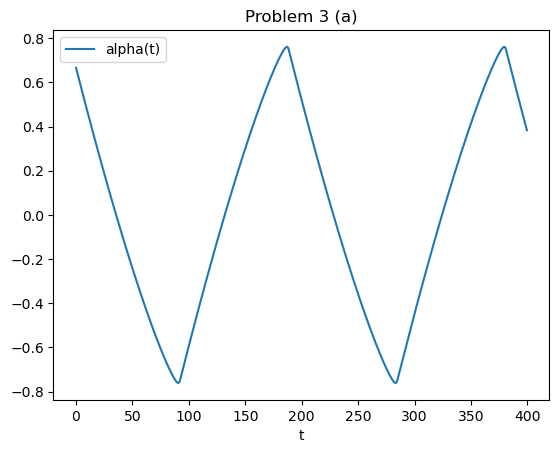

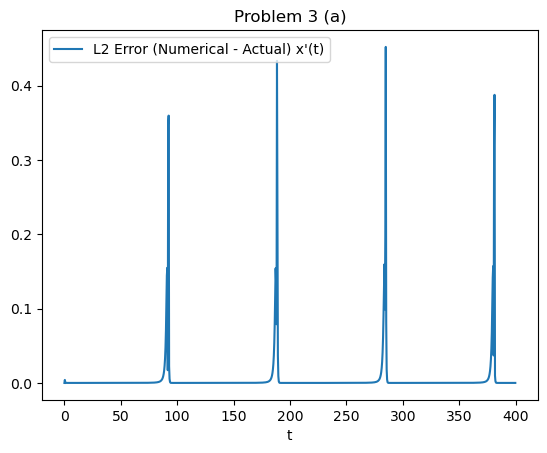

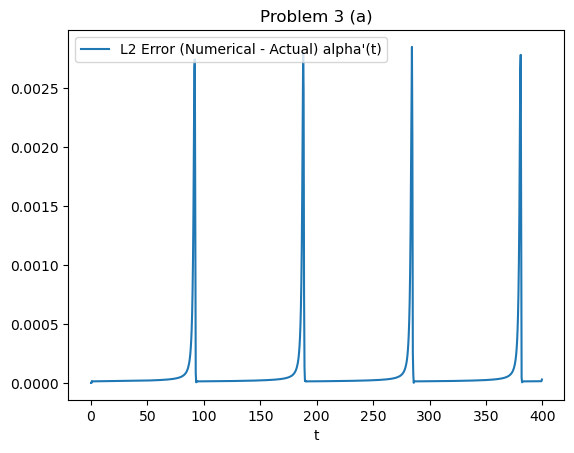

In [2]:
# Problem 3 (a).
# Use Euler's method (forward).
# Params.
eps = 1/100
x0 = 2
a0 = 2/3

# To t = 400.
n = 1000
h = 400 / n

# Make storage for solutions.
x = np.zeros(shape=n)
x[0] = x0
a = np.zeros(shape=n)
a[0] = a0

# Do forward Euler.
for i in range(1, n):
    f_x_i = -(x[i-1] ** 3)/3 + x[i-1] + a[i-1]
    f_a_i = -eps * x[i-1]    
    x[i] = x[i-1] + h * f_x_i
    a[i] = a[i-1] + h * f_a_i

# Compute numerical derivative / error.
t = np.arange(n) * h
numer_deriv_x = np.gradient(x, t)
actual_deriv_x = -(x ** 3)/3 + x + a
error_x = np.sqrt((numer_deriv_x - actual_deriv_x) ** 2)

numer_deriv_a = np.gradient(a, t)
actual_deriv_a = -eps * x
error_a = np.sqrt((numer_deriv_a - actual_deriv_a) ** 2)

# Plot solutions.
fig, ax = plt.subplots()
plt.plot(t, x, label="X(t)")
plt.title("Problem 3 (a)")
plt.xlabel("t")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(t, a, label="alpha(t)")
plt.title("Problem 3 (a)")
plt.xlabel("t")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(t, error_x, label="L2 Error (Numerical - Actual) x'(t)")
plt.title("Problem 3 (a)")
plt.xlabel("t")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(t, error_a, label="L2 Error (Numerical - Actual) alpha'(t)")
plt.title("Problem 3 (a)")
plt.xlabel("t")
plt.legend()
plt.show()

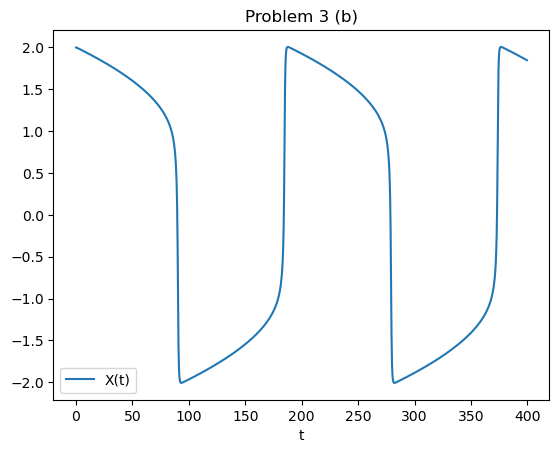

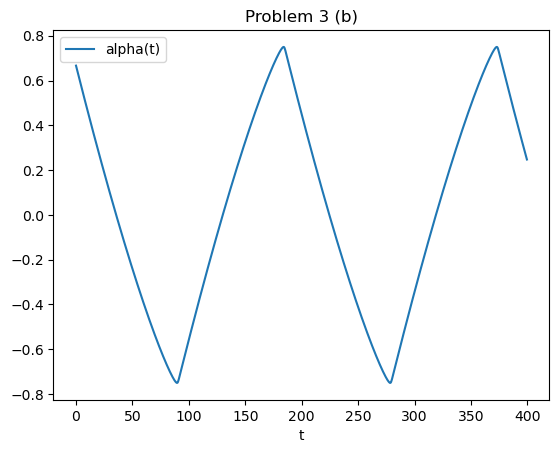

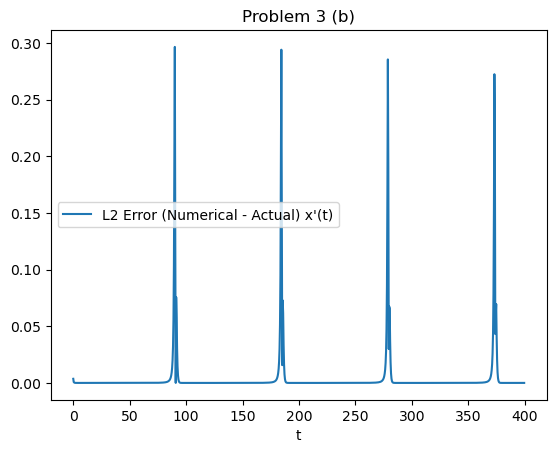

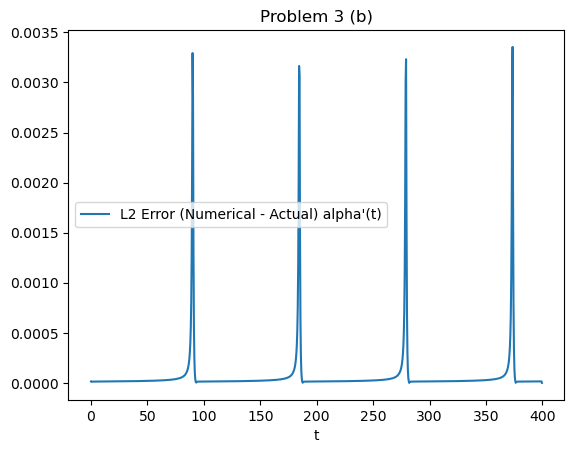

In [4]:
# Problem 3 (b).
# Use Euler's method (backward).
# Params.
eps = 1/100
x0 = 2
a0 = 2/3

# To t = 400.
n = 1000
h = 400 / n

# Make storage for solutions.
x = np.zeros(shape=n)
x[0] = x0
a = np.zeros(shape=n)
a[0] = a0

# Stack x and a.
w = np.row_stack([x, a])

for i in range(1, n):
    # Previous.
    w_prev = w[:, i-1]
    x_prev = w_prev[0]
    a_prev = w_prev[1]

    if i == 1:
        # Initial guess for the new values (starting with the previous values).
        x_new = x_prev
        a_new = a_prev

    # Get G.
    g0 = x_new - x_prev - h * (-(1/3) * x_prev ** 3 + x_prev + a_prev)
    g1 = a_new - a_prev + h * eps * x_prev
    G = np.array([g0, g1])

    # Get J.
    J = np.array([[1 + h*(x_prev ** 2 - 1),  -h], [eps * h, 1]])

    # Update the guess for w_new using Newton's method
    delta_w = np.linalg.solve(J, -G)
    x_new += delta_w[0]
    a_new += delta_w[1]

    # # Update.
    w[:, i] = np.array([x_new, a_new])

# Separate x and a.
t = np.arange(n) * h
x = w[0, :]
a = w[1, :]

# Compute numerical derivative / error.
numer_deriv_x = np.gradient(x, t)
actual_deriv_x = -(x ** 3)/3 + x + a
error_x = np.sqrt((numer_deriv_x - actual_deriv_x) ** 2)

numer_deriv_a = np.gradient(a, t)
actual_deriv_a = -eps * x
error_a = np.sqrt((numer_deriv_a - actual_deriv_a) ** 2)

# Plot.
fig, ax = plt.subplots()
plt.plot(t, x, label="X(t)")
plt.title("Problem 3 (b)")
plt.xlabel("t")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(t, a, label="alpha(t)")
plt.title("Problem 3 (b)")
plt.xlabel("t")
plt.legend()
plt.show()    

fig, ax = plt.subplots()
plt.plot(t, error_x, label="L2 Error (Numerical - Actual) x'(t)")
plt.title("Problem 3 (b)")
plt.xlabel("t")
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(t, error_a, label="L2 Error (Numerical - Actual) alpha'(t)")
plt.title("Problem 3 (b)")
plt.xlabel("t")
plt.legend()
plt.show()